In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [4]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head


<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data = df[["tenure","Contract","MonthlyCharges","TotalCharges","InternetService","TechSupport","OnlineSecurity","OnlineBackup","DeviceProtection"]]
data

,tenure,Contract,MonthlyCharges,TotalCharges,InternetService,TechSupport,OnlineSecurity,OnlineBackup,DeviceProtection
0,1,Month-to-month,29.85,29.85,DSL,No,No,Yes,No
1,34,One year,56.95,1889.5,DSL,No,Yes,No,Yes
2,2,Month-to-month,53.85,108.15,DSL,No,Yes,Yes,No
3,45,One year,42.30,1840.75,DSL,Yes,Yes,No,Yes
4,2,Month-to-month,70.70,151.65,Fiber optic,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,24,One year,84.80,1990.5,DSL,Yes,Yes,No,Yes
7039,72,One year,103.20,7362.9,Fiber optic,No,No,Yes,Yes
7040,11,Month-to-month,29.60,346.45,DSL,No,Yes,No,No
7041,4,Month-to-month,74.40,306.6,Fiber optic,No,No,No,No


In [8]:
#Missing values
data.isna().sum()

tenure              0
Contract            0
MonthlyCharges      0
TotalCharges        0
InternetService     0
TechSupport         0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
dtype: int64

In [9]:
#Missing value count
data.isna().sum().sum()

0

In [10]:
numeric_column_data = df.select_dtypes(include = ["number"])
numeric_column_data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [11]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [12]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [13]:
# Vissualization part
# Bellow this sextion there will be some visualizations for better analysis 

Text(0.5, 0, 'Contract')

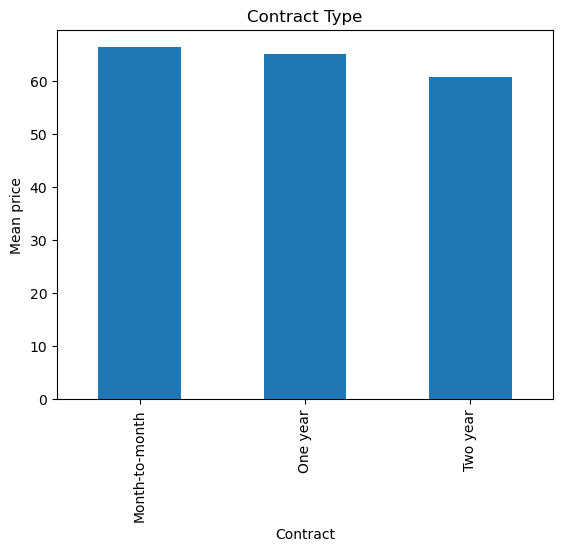

In [14]:
df.groupby("Contract")["MonthlyCharges"].mean().plot(kind = "bar")
plt.title("Contract Type")
plt.ylabel("Mean price")
plt.xlabel("Contract")

Text(0.5, 1.0, 'MonthlyCharges')

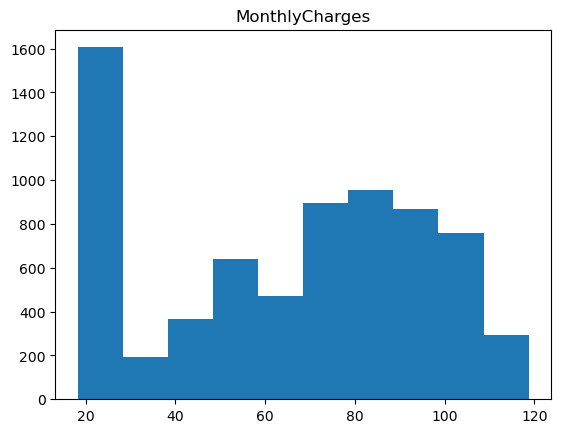

In [15]:
plt.hist(df["MonthlyCharges"])
plt.title("MonthlyCharges")

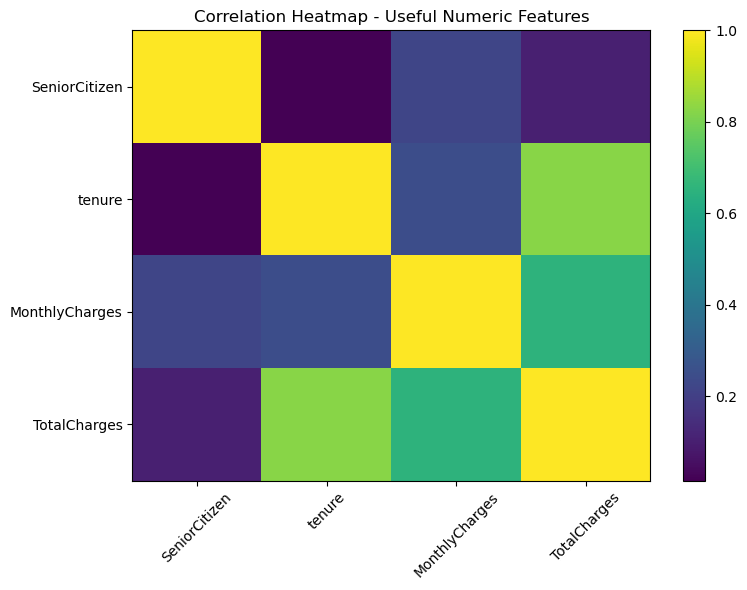

In [16]:
# We selected SeniorCitizen, tenure, MonthlyCharges, and TotalCharges because they are the main numeric features in the dataset that can show meaningful linear relationships.
#Heatmaps work best with numeric values, and these features help us understand customer behavior:

# tenure – shows how long a customer has been with the company.
# MonthlyCharges – shows how much they pay every month.
# TotalCharges – shows the total revenue from each customer.
# SeniorCitizen – indicates whether the customer is a senior (numeric 0/1).

# These features are useful because they allow us to see how customer spending relates to time and demographic factors, 
#and they form the strongest correlations in the dataset—for example, longer tenure naturally increases total charges.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", np.nan), errors='coerce')

# Drop rows where numeric conversion failed
df = df.dropna(subset=['TotalCharges'])

numeric_df = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='viridis', aspect='auto')
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlation Heatmap - Useful Numeric Features")
plt.tight_layout()
plt.show()

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
# Chunk 12: Define Features & Target
# Target
y = (df['Churn'] == 'Yes').astype(int)

# Features (drop Churn)
X = df.drop('Churn', axis=1)

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts(normalize=True).round(3))

X shape: (7032, 20)
y distribution:
 Churn
0    0.734
1    0.266
Name: proportion, dtype: float64


In [41]:
# Chunk 12: Define Features & Target
# Target
y = (df['Churn'] == 'Yes').astype(int)

# Features (drop Churn)
X = df.drop('Churn', axis=1)

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts(normalize=True).round(3))

X shape: (7032, 20)
y distribution:
 Churn
0    0.734
1    0.266
Name: proportion, dtype: float64
